In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
import pickle 

In [2]:
data=pd.read_csv(r"C:\Project\dataset\25.csv") 
data.shape

(96, 7)

In [3]:
data.head(8) 

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,500,66
5,2017-10-11,4545,100,149,6,0,66
6,2017-10-12,4340,100,140,6,0,66
7,2017-10-13,1230,100,38,7,0,66


In [4]:
data.tail() 

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,500,64
94,2018-01-08,2127,200,0,5,0,64
95,2018-01-09,2203,300,0,5,500,64


In [5]:
data.columns 

Index(['date', 'step_count', 'mood', 'calories_burned', 'hours_of_sleep',
       'bool_of_active', 'weight_kg'],
      dtype='object')

In [6]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             96 non-null     object
 1   step_count       96 non-null     int64 
 2   mood             96 non-null     int64 
 3   calories_burned  96 non-null     int64 
 4   hours_of_sleep   96 non-null     int64 
 5   bool_of_active   96 non-null     int64 
 6   weight_kg        96 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.4+ KB


In [7]:
data.describe()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
count,96.000000,96.000000,96.000000,96.00000,96.000000,96.000000
mean,2935.937500,211.458333,93.447917,5.21875,218.750000,64.281250
std,2143.384573,84.442184,71.601951,1.51625,249.341237,0.627495
min,25.000000,100.000000,0.000000,2.00000,0.000000,64.000000
25%,741.000000,100.000000,21.750000,4.00000,0.000000,64.000000
50%,2987.500000,200.000000,96.000000,5.00000,0.000000,64.000000
75%,4546.250000,300.000000,149.250000,6.00000,500.000000,64.000000
max,7422.000000,300.000000,243.000000,9.00000,500.000000,66.000000


In [8]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('int64'), dtype('O')], dtype=object), array([6, 1], dtype=int64))

In [9]:
def category(data):
    for i in data.columns: 
        print(i)
        print(data[i].unique())
        print("x"*90)
category(data)

date
['2017-10-06' '2017-10-07' '2017-10-08' '2017-10-09' '2017-10-10'
 '2017-10-11' '2017-10-12' '2017-10-13' '2017-10-14' '2017-10-15'
 '2017-10-16' '2017-10-17' '2017-10-18' '2017-10-19' '2017-10-20'
 '2017-10-21' '2017-10-22' '2017-10-23' '2017-10-24' '2017-10-25'
 '2017-10-26' '2017-10-27' '2017-10-28' '2017-10-29' '2017-10-30'
 '2017-10-31' '2017-11-01' '2017-11-02' '2017-11-03' '2017-11-04'
 '2017-11-05' '2017-11-06' '2017-11-07' '2017-11-08' '2017-11-09'
 '2017-11-10' '2017-11-11' '2017-11-12' '2017-11-13' '2017-11-14'
 '2017-11-15' '2017-11-16' '2017-11-17' '2017-11-18' '2017-11-19'
 '2017-11-20' '2017-11-21' '2017-11-22' '2017-11-23' '2017-11-24'
 '2017-11-25' '2017-11-26' '2017-11-27' '2017-11-28' '2017-11-29'
 '2017-11-30' '2017-12-01' '2017-12-02' '2017-12-03' '2017-12-04'
 '2017-12-05' '2017-12-06' '2017-12-07' '2017-12-08' '2017-12-09'
 '2017-12-10' '2017-12-11' '2017-12-12' '2017-12-13' '2017-12-14'
 '2017-12-15' '2017-12-16' '2017-12-17' '2017-12-18' '2017-12-19'
 '201

In [10]:
data["bool_of_active"].unique()

array([  0, 500], dtype=int64)

In [11]:
data["mood"].unique()

array([200, 100, 300], dtype=int64)

In [12]:
data['weight_kg'].unique()

array([66, 65, 64], dtype=int64)

In [13]:
data['hours_of_sleep'].unique()

array([5, 8, 4, 6, 7, 3, 2, 9], dtype=int64)

In [14]:
data.corr()

,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
step_count,1.000000,0.246738,0.989260,0.080687,0.120212,0.109404
mood,0.246738,1.000000,0.235044,0.210417,0.379646,-0.458776
calories_burned,0.989260,0.235044,1.000000,0.080726,0.110900,0.112200
hours_of_sleep,0.080687,0.210417,0.080726,1.000000,0.136603,0.189118
bool_of_active,0.120212,0.379646,0.110900,0.136603,1.000000,-0.296443
weight_kg,0.109404,-0.458776,0.112200,0.189118,-0.296443,1.000000


In [15]:
data.isnull().any() 

date               False
step_count         False
mood               False
calories_burned    False
hours_of_sleep     False
bool_of_active     False
weight_kg          False
dtype: bool

In [16]:
data.isnull().sum() 

date               0
step_count         0
mood               0
calories_burned    0
hours_of_sleep     0
bool_of_active     0
weight_kg          0
dtype: int64

<AxesSubplot:>

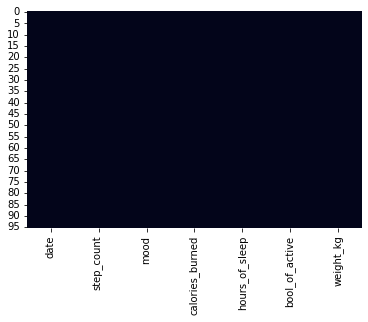

In [17]:
sns.heatmap(data.isnull(),cbar=False)

In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of_active']=le.fit_transform(data['bool_of_active'])
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,1,64
94,2018-01-08,2127,200,0,5,0,64


<AxesSubplot:>

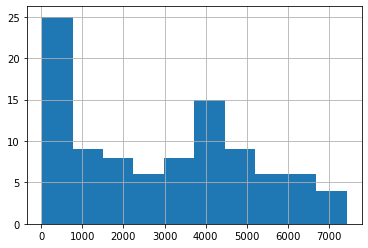

In [19]:
data['step_count'].hist()

<AxesSubplot:>

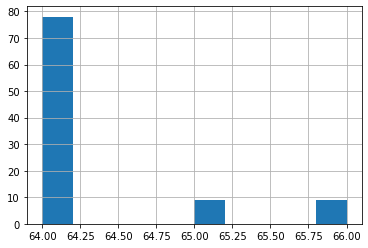

In [20]:
data['weight_kg'].hist()  

<AxesSubplot:>

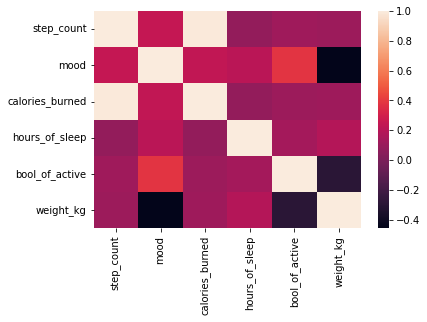

In [21]:
corr=data.corr() 
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns) 

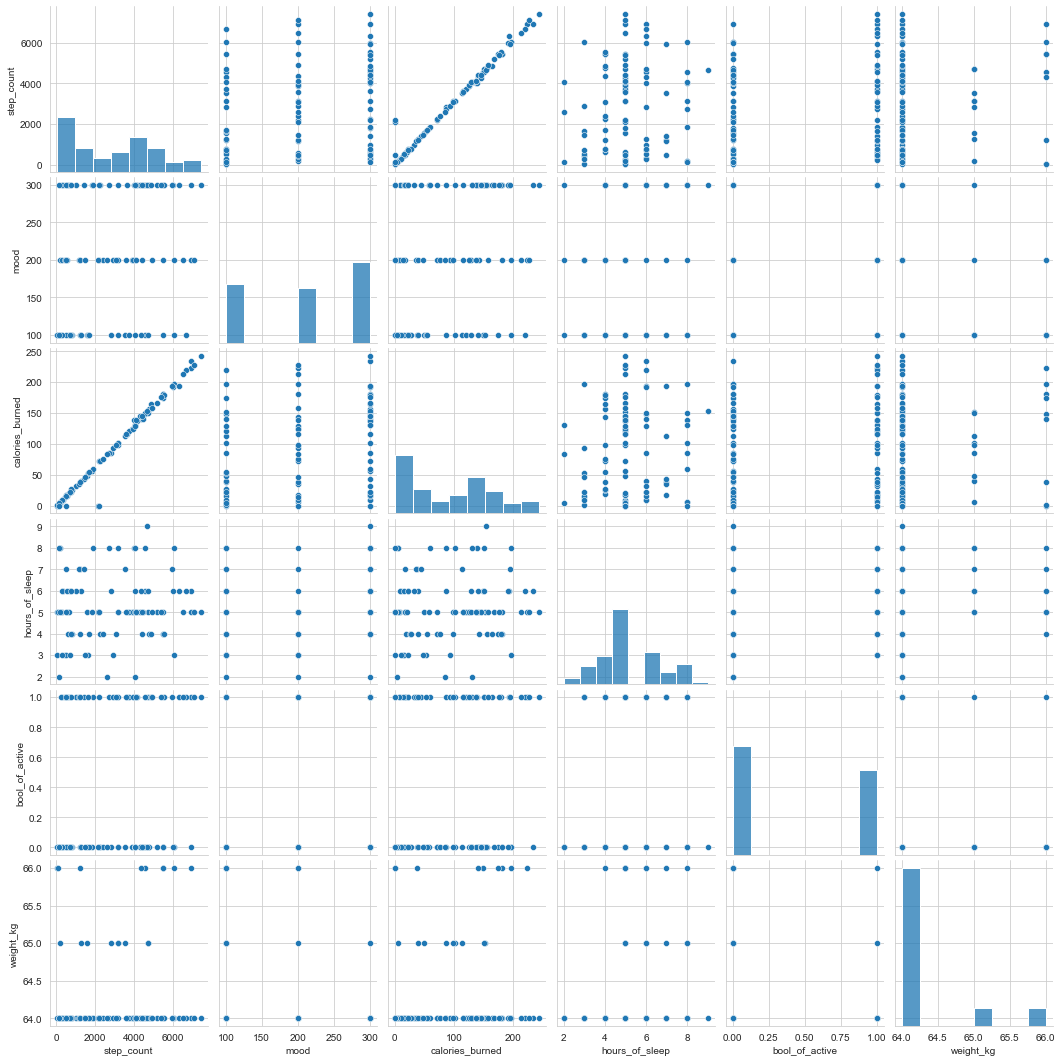

In [22]:
sns.set_style("whitegrid")
sns.pairplot(data) 

In [23]:
data['step_count'].groupby(data.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,29.0,2103.068966,2057.012361,25.0,299.0,1258.0,3721.00,6676.0
200,27.0,3153.777778,2091.761446,202.0,1339.0,3066.0,4245.50,7102.0
300,40.0,3392.725000,2115.006540,153.0,1314.5,4048.5,4804.25,7422.0


<Figure size 432x360 with 0 Axes>

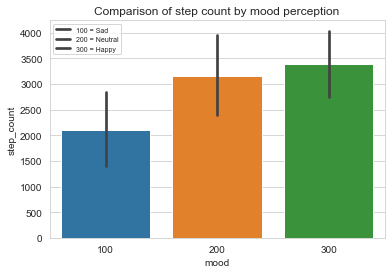

<Figure size 432x360 with 0 Axes>

In [24]:
sns.barplot(x="mood",y="step_count",data=data)
plt.title('Comparison of step count by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

In [25]:
data.step_count.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,2709.888889,2059.107323,25.0,663.75,2486.5,4411.5,6930.0
1,42.0,3226.571429,2238.337734,221.0,1037.00,3362.0,4843.0,7422.0


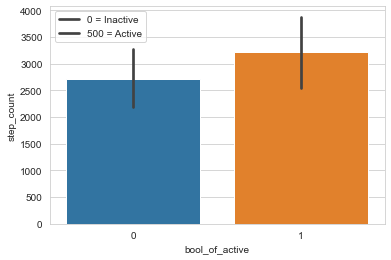

In [26]:
sns.barplot(x='bool_of_active',y="step_count",data=data)
plt.legend(['0 = Inactive','500 = Active'])

In [27]:
data.calories_burned.groupby(data.mood)

<Figure size 432x360 with 0 Axes>

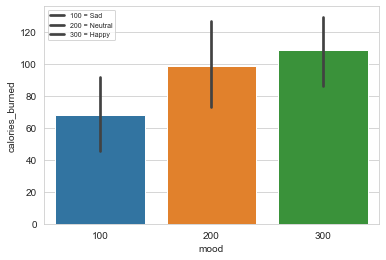

<Figure size 432x360 with 0 Axes>

In [28]:
sns.barplot(x = "mood", y="calories_burned", data = data)
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

In [29]:
data.calories_burned.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,86.481481,68.694495,0.0,17.25,80.0,144.5,234.0
1,42.0,102.404762,75.053821,0.0,25.25,108.5,156.0,243.0


<Figure size 432x360 with 0 Axes>

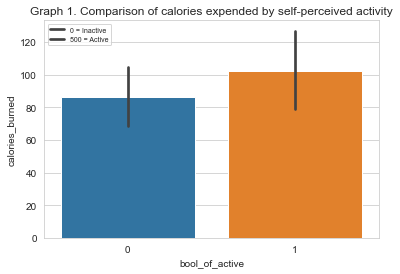

<Figure size 432x360 with 0 Axes>

In [30]:
sns.barplot(x = "bool_of_active", y="calories_burned", data = data)
plt.title('Graph 1. Comparison of calories expended by self-perceived activity')
plt.legend(['0 = Inactive', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

In [31]:
data.hours_of_sleep.groupby(data.mood).describe()

,count,mean,std,min,25%,50%,75%,max
mood,,,,,,,,
100,29.0,5.034483,1.614284,2.0,4.0,5.0,6.00,8.0
200,27.0,4.666667,1.240347,2.0,4.0,5.0,5.00,8.0
300,40.0,5.725000,1.484752,2.0,5.0,5.5,6.25,9.0


<Figure size 432x360 with 0 Axes>

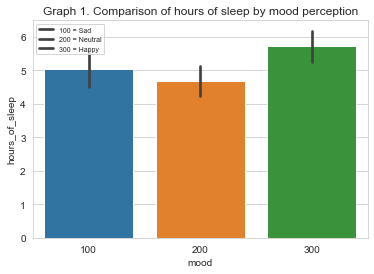

<Figure size 432x360 with 0 Axes>

In [32]:
sns.barplot(x = "mood", y="hours_of_sleep", data = data)
plt.title('Graph 1. Comparison of hours of sleep by mood perception')
plt.legend(['100 = Sad', '200 = Neutral', '300 = Happy'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

In [33]:
data.hours_of_sleep.groupby(data.bool_of_active).describe()

,count,mean,std,min,25%,50%,75%,max
bool_of_active,,,,,,,,
0,54.0,5.037037,1.613188,2.0,4.0,5.0,6.0,9.0
1,42.0,5.452381,1.365112,3.0,5.0,5.0,6.0,8.0


<Figure size 432x360 with 0 Axes>

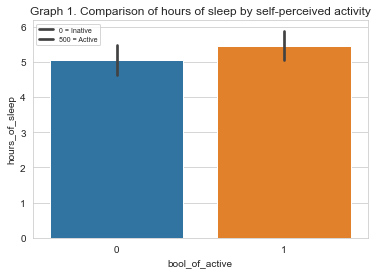

<Figure size 432x360 with 0 Axes>

In [34]:
sns.barplot(x = "bool_of_active", y="hours_of_sleep", data = data)
plt.title('Graph 1. Comparison of hours of sleep by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

In [35]:
pd.crosstab([data. bool_of_active], [data.mood], normalize='index', margins=True)*100

mood,100,200,300
bool_of_active,,,
0,46.296296,24.074074,29.629630
1,9.523810,33.333333,57.142857
All,30.208333,28.125000,41.666667


<Figure size 432x360 with 0 Axes>

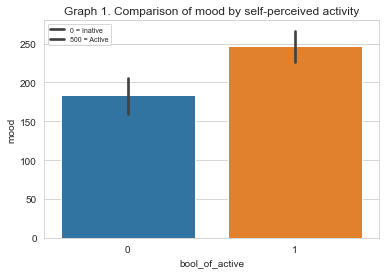

<Figure size 432x360 with 0 Axes>

In [36]:
sns.barplot(x = "bool_of_active", y="mood", data = data)
plt.title('Graph 1. Comparison of mood by self-perceived activity')
plt.legend(['0 = Inative', '500 = Active'], loc='upper left', prop={'size': 7})
plt.figure(figsize=(6,5))

<AxesSubplot:>

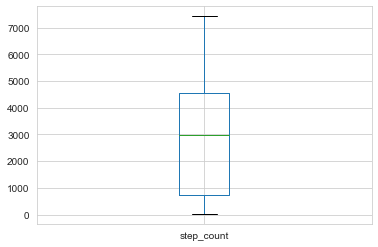

In [37]:
data.boxplot(column="step_count")

<AxesSubplot:>

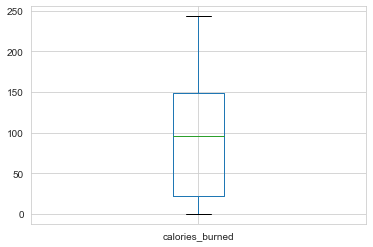

In [38]:
data.boxplot(column="calories_burned") 

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['bool_of_active']=le.fit_transform(data['bool_of_active'])
data

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
0,2017-10-06,5464,200,181,5,0,66
1,2017-10-07,6041,100,197,8,0,66
2,2017-10-08,25,100,0,5,0,66
3,2017-10-09,5461,100,174,4,0,66
4,2017-10-10,6915,200,223,5,1,66
...,...,...,...,...,...,...,...
91,2018-01-05,133,100,4,2,0,64
92,2018-01-06,153,300,0,8,0,64
93,2018-01-07,500,200,0,5,1,64
94,2018-01-08,2127,200,0,5,0,64


In [40]:
x=pd.DataFrame(data.iloc[:,[1,2,3,4,6]])
y=pd.DataFrame(data.iloc[:,5])

In [41]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [1])], 
                                      remainder='passthrough') 
  
x = pd.DataFrame(columnTransformer.fit_transform(x),dtype = np.str,columns=['sad','neutral','happy','step_count','calories_burned','hours_of_sleep','weight_kg'])
x

C:\Users\ANEESH~1\AppData\Local\Temp/ipykernel_13384/1325429823.py:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = pd.DataFrame(columnTransformer.fit_transform(x),dtype = np.str,columns=['sad','neutral','happy','step_count','calories_burned','hours_of_sleep','weight_kg'])


,sad,neutral,happy,step_count,calories_burned,hours_of_sleep,weight_kg
0,0.0,1.0,0.0,5464.0,181.0,5.0,66.0
1,1.0,0.0,0.0,6041.0,197.0,8.0,66.0
2,1.0,0.0,0.0,25.0,0.0,5.0,66.0
3,1.0,0.0,0.0,5461.0,174.0,4.0,66.0
4,0.0,1.0,0.0,6915.0,223.0,5.0,66.0
...,...,...,...,...,...,...,...
91,1.0,0.0,0.0,133.0,4.0,2.0,64.0
92,0.0,0.0,1.0,153.0,0.0,8.0,64.0
93,0.0,1.0,0.0,500.0,0.0,5.0,64.0
94,0.0,1.0,0.0,2127.0,0.0,5.0,64.0


In [42]:
import pickle
with open('encoder.pickle', 'wb') as f:
    pickle.dump(columnTransformer, f)

In [43]:
x.shape

(96, 7)

In [44]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=0)

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=12)  
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [46]:
dt_y_train=dtc.predict([['0.0', '0.0', '1.0', '4435.0', '141.0', '5.0', '64.0']])
dt_y_train

array([1], dtype=int64)

In [47]:
dtc.score(x_train,y_train)

0.9883720930232558

In [48]:
import pickle
pickle.dump(dtc, open('fitness.pkl','wb'))

In [49]:
enc=pickle.load(open("encoder.pickle",'rb'))

In [50]:
model=pickle.load(open("fitness.pkl","rb"))